 # A Computer Vision Project

In [5]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0-alpha0


## Dataset
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

**Labels**

Each training and test example is assigned to one of the following labels:    

0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot  

In [52]:
# Loading Fashion-mnist dataset 
mnist = tf.keras.datasets.fashion_mnist

In [53]:
#Trainin & Testing the data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

2
[[  0   0   0   1   0   0   0   0   0  34 148 202 107  84 162 198  90  26   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  21 107 166 168 152 204 238 248 237 190 142 178 158  98  17   0   0   0   0   0   0   0]
 [  0   0   0   1   0  55 188 140 131 121 119 116 146 157 132 115 136 125 140 143 181  51   0   0   0   0   0   0]
 [  0   0   0   0   0 167 134 113 130 134 140 132 125 125 131 135 130 133 131 115 135 163   6   0   0   0   0   0]
 [  0   0   0   0  58 148 133 124 134 128 135 128 133 130 133 137 138 130 124 130 133 147  82   0   1   0   0   0]
 [  0   0   0   0  86 148 158 139 124 120 131 134 132 134 124 134 132 137 126 137 136 146 114   0   0   0   0   0]
 [  0   0   0   0 112 141 174 143 117 134 130 128 131 136 134 128 128 131 106 187 149 147 143   0   0   0   0   0]
 [  0   0   0   0 134 151 167 154 114 134 138 139 135 135 130 130 124 129 119 229 141 145 164   0   0   0   0   0]
 [  0   0   0   0 136 154 169 157 109 147 140 137 137 136 142 141 139 129 123 

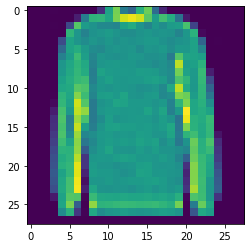

In [54]:
#plot a data sample (i.e an image)
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[45])
print(training_labels[45])
print(training_images[45])

The values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'.

In [55]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [56]:
# design the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [60]:
#Neural Network designing
model = keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), #image shape is 28 X 28. We are specifying here to expect the input by 28 x 28.
                          tf.keras.layers.Dense(128, activation = tf.nn.relu),
                          tf.keras.layers.Dense(10, activation = tf.nn.softmax) #10 is the number of classes in dataset
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


In [58]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5014 - accuracy: 0.8238
Epoch 2/30
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3774 - accuracy: 0.8634
Epoch 3/30
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3376 - accuracy: 0.8763
Epoch 4/30
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3110 - accuracy: 0.8858
Epoch 5/30
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2950 - accuracy: 0.8920
Epoch 6/30
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2826 - accuracy: 0.8953
Epoch 7/30
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2674 - accuracy: 0.9005
Epoch 8/30
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2584 - accuracy: 0.9042
Epoch 9/30
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2479 - accuracy: 0.9070
Epoch 10/30
60000/60000 [============

In [43]:
#Model evaluation
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3613 - accuracy: 0.8860


[0.36134741147756577, 0.886]

In [44]:
#gives the the probability that this item is each of the 10 classes
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[5.7420787e-11 1.1006636e-13 6.2703786e-13 1.3650139e-18 1.7614985e-12 1.6893561e-04 4.4193991e-14 6.1535265e-04 2.3089564e-14 9.9921572e-01]
9


# Using Callback to stop Training

In [59]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])



2.0.0-alpha0
Epoch 1/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.4956 - accuracy: 0.8246
Epoch 2/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3730 - accuracy: 0.8650
Epoch 3/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3348 - accuracy: 0.8780
Epoch 4/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3126 - accuracy: 0.8852
Epoch 5/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2929 - accuracy: 0.8918
Epoch 6/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2801 - accuracy: 0.8967
Epoch 7/15
59392/60000 [============================>.] - ETA: 0s - loss: 0.2653 - accuracy: 0.9012
Reached 90% accuracy so cancelling training!
10000/10000 [==============================] - 0s 21us/sample - loss: 0.3511 - accuracy: 0.8772
[2.0990917e-06 2.2640103e-08 1.3938508e-08 4.2507131e-09 1.6742990e-09 1.4683582e-02 4.9993400e-07 3.274

 Accuracy is 90% on training and 87% on validation data. 

# Improving Computer Vision Accuracy using Convolutions


In [62]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), #convolution layer
  tf.keras.layers.MaxPooling2D(2, 2), #pooling layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),#convolution layer
  tf.keras.layers.MaxPooling2D(2,2),#pooling layer
  tf.keras.layers.Flatten(), #input layer
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')#output layer
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.0.0-alpha0
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_50 (Dense)             (None, 10) 

It's likely gone up to about 93% on the training data and 91% on the validation data.

## Reshaping the training and testing data
First convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1

In [63]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.0.0-alpha0
Epoch 1/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.1604 - accuracy: 0.9528
Epoch 2/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0529 - accuracy: 0.9839
Epoch 3/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0352 - accuracy: 0.9890
Epoch 4/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.0221 - accuracy: 0.9929
Epoch 5/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0162 - accuracy: 0.9946
Epoch 6/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.0104 - accuracy: 0.9966
Epoch 7/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.0086 - accuracy: 0.9972
Epoch 8/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.0061 - accuracy: 0.9980
Epoch 9/10
60000/60000 [==============================] - 11s 191us/sample - loss: 0.0061 - accuracy: 0.9980
Epoch 

**32 Convolutions** accuracy is 99.8% and validation is 98.8%.

In [64]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.0.0-alpha0
Epoch 1/10
60000/60000 [==============================] - 17s 286us/sample - loss: 0.1331 - accuracy: 0.9600
Epoch 2/10
60000/60000 [==============================] - 17s 281us/sample - loss: 0.0468 - accuracy: 0.9856
Epoch 3/10
60000/60000 [==============================] - 17s 287us/sample - loss: 0.0294 - accuracy: 0.9912
Epoch 4/10
60000/60000 [==============================] - 17s 285us/sample - loss: 0.0200 - accuracy: 0.9931
Epoch 5/10
60000/60000 [==============================] - 17s 286us/sample - loss: 0.0122 - accuracy: 0.9959
Epoch 6/10
60000/60000 [==============================] - 17s 286us/sample - loss: 0.0101 - accuracy: 0.9967
Epoch 7/10
60000/60000 [==============================] - 18s 293us/sample - loss: 0.0068 - accuracy: 0.9976
Epoch 8/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0064 - accuracy: 0.9979
Epoch 9/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0048 - accuracy: 0.9985
Epoch 

For **64 Convolutions** accuracy is 99.8% and validation is 98.05%.

In [65]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.0.0-alpha0
Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1735 - accuracy: 0.9489
Epoch 2/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0589 - accuracy: 0.9816
Epoch 3/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0378 - accuracy: 0.9882
Epoch 4/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0260 - accuracy: 0.9919
Epoch 5/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0178 - accuracy: 0.9940
Epoch 6/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0126 - accuracy: 0.9959
Epoch 7/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0103 - accuracy: 0.9964
Epoch 8/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0070 - accuracy: 0.9978
Epoch 9/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0057 - accuracy: 0.9982
Epoch 10/10
100